In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
SA1 = gpd.read_file('Study_Area_1.shp')
SA2 = gpd.read_file('Study_Area_2.shp')
river = gpd.read_file('river.shp')

<AxesSubplot:>

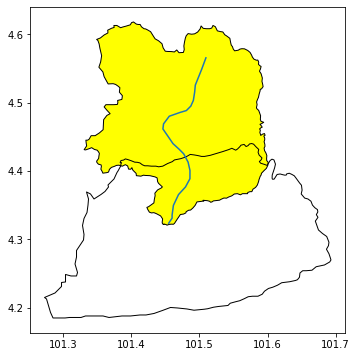

In [3]:
fig, ax = plt.subplots(figsize = (8, 6))
SA1.plot(ax = ax, color ='yellow', edgecolor = 'black')
SA2.plot(ax = ax, color = 'none', edgecolor = 'black')
river.plot(ax = ax)

<AxesSubplot:>

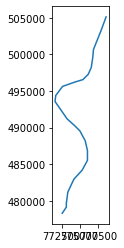

In [8]:
## Buffer around line (river)
# Check line (river) coordinate system: EPSG 4326, UNIT: degree 
river.crs

# Reprojecting the rive GeoPandas GeoDataFrame into projected coordinate system: EPSG , UNIT: meters
river_projected = river.to_crs(epsg = 24547)
river_projected.crs
river_projected.plot()

<AxesSubplot:>

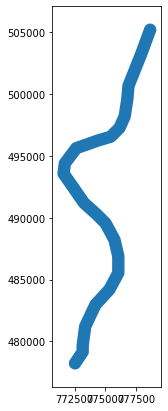

In [11]:
# Buffer around line (river) on GeoSeries - river_projected['geometry']

buffer_500 = river_projected['geometry'].buffer(distance = 500)
buffer_500.plot(figsize=(7, 7))

<AxesSubplot:>

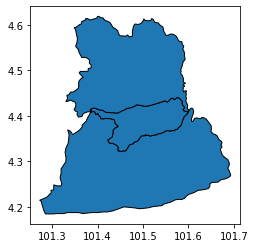

In [13]:
## Obtaining the Centroid on Union - 3 polygons
union = gpd.overlay(SA1, SA2, how = 'union')
union.plot(edgecolor = 'black')


C:\Users\jh37495\AppData\Local\Temp/ipykernel_19444/927707880.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = union['geometry'].centroid


<AxesSubplot:>

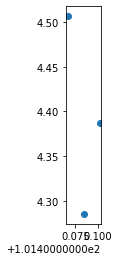

In [16]:
# Centroid work on GeoSeries - union['geometry']
centroid = union['geometry'].centroid
centroid.plot()

<AxesSubplot:>

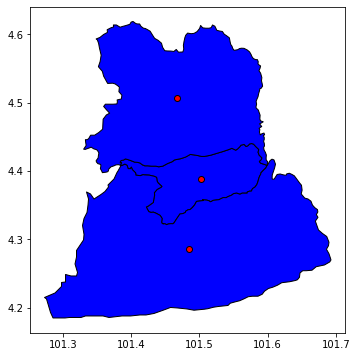

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))
union.plot(ax = ax, color ='blue', edgecolor = 'black')
centroid.plot(ax = ax, color = 'red', edgecolor = 'black')